In [304]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [305]:
# The path to our CSV file
school_saftey = "Resources/2010-2016-school-safety-report.csv"

In [306]:
# Read our Kickstarter data into pandas
school_saftey_df = pd.read_csv(school_saftey, dtype={'Postcode':str})
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
school_saftey_df

,School Year,Building Code,DBN,Location Name,Location Code,Address,Postcode,Borough,Borough Name,Geographical District Code,Register,Building Name,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,2015-16,M933,02M933,City Knoll Middle School,M339,425 WEST 33RD STREET,10001,M,MANHATTAN,2.0,157,NaN,1,City Knoll Middle School,0.0,0.0,0.0,0.0,0.0,2C,1-250,0.24,0.71,1.71,0.51,0.32,40.753091,-73.997640,4,3,103,1012851.0,1.007310e+09,Hudson Yards-Chelsea-Flatiron-Union Square ...
1,2015-16,M920,02M570,Satellite Academy High School,M570,120 WEST 30 STREET,10001,M,MANHATTAN,2.0,266,NaN,1,Satellite Academy High School,0.0,0.0,1.0,0.0,0.0,3C,251-500,0.27,0.90,1.67,0.63,0.44,40.747621,-73.990454,5,3,95,1015148.0,1.008050e+09,Midtown-Midtown South ...
2,2015-16,M033,02M033,P.S. 033 Chelsea Prep,M033,281 9 AVENUE,10001,M,MANHATTAN,2.0,639,NaN,1,P.S. 033 Chelsea Prep,1.0,0.0,2.0,1.0,0.0,4C,501-750,0.28,1.11,1.74,0.75,0.53,40.748818,-73.999646,4,3,97,1012829.0,1.007240e+09,Hudson Yards-Chelsea-Flatiron-Union Square ...
3,2014-15,M033,02M033,P.S. 033 Chelsea Prep,M033,281 9 AVENUE,10001,M,MANHATTAN,2.0,634,NaN,1,P.S. 033 Chelsea Prep,1.0,1.0,0.0,2.0,0.0,4C,501-750,0.31,1.12,1.82,0.79,0.51,40.748818,-73.999646,4,3,97,1012829.0,1.007240e+09,Hudson Yards-Chelsea-Flatiron-Union Square ...
4,2014-15,M920,02M570,Satellite Academy High School,M570,120 WEST 30 STREET,10001,M,MANHATTAN,2.0,266,NaN,1,Satellite Academy High School,0.0,2.0,1.0,2.0,0.0,3C,251-500,0.27,1.11,1.38,0.80,0.48,40.747621,-73.990454,5,3,95,1015148.0,1.008050e+09,Midtown-Midtown South ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,2013-14,Q225,NaN,190 BEACH 110 STREET CONSOLIDATED LOCATION,NaN,190 BEACH 110 STREET,11694,Q,QUEENS,27.0,615,190 BEACH 110 STREET CONSOLIDATED LOCATION,2,WATERSIDE CHILDREN'S STUDIO SCHOOL | WATERSID...,0.0,0.0,3.0,0.0,0.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,40.580928,-73.831836,14,32,938,4303853.0,4.161810e+09,Breezy Point-Belle Harbor-Rockaway Park-Broad ...
6282,2013-14,Q225,27Q317,WATERSIDE CHILDREN'S STUDIO SCHOOL,Q317,190 BEACH 110 STREET,11694,Q,QUEENS,27.0,441,190 BEACH 110 STREET CONSOLIDATED LOCATION,2,WATERSIDE CHILDREN'S STUDIO SCHOOL | WATERSID...,NaN,NaN,NaN,NaN,NaN,3C,251-500,NaN,NaN,NaN,NaN,NaN,40.580928,-73.831836,14,32,938,4303853.0,4.161810e+09,Breezy Point-Belle Harbor-Rockaway Park-Broad ...
6283,2013-14,Q225,27Q318,WATERSIDE SCHOOL FOR LEADERSHIP,Q318,190 BEACH 110 STREET,11694,Q,QUEENS,27.0,174,190 BEACH 110 STREET CONSOLIDATED LOCATION,2,WATERSIDE CHILDREN'S STUDIO SCHOOL | WATERSID...,NaN,NaN,NaN,NaN,NaN,2C,1-250,NaN,NaN,NaN,NaN,NaN,40.580928,-73.831836,14,32,938,4303853.0,4.161810e+09,Breezy Point-Belle Harbor-Rockaway Park-Broad ...
6284,2013-14,Q180,27Q323,Scholars' Academy,Q323,320 BEACH 104TH STREET,11694,Q,QUEENS,27.0,"1,253",NaN,1,Scholars' Academy,1.0,1.0,0.0,2.0,0.0,7C,1251-1500,0.86,3.26,5.55,2.17,1.29,40.584109,-73.825711,14,32,938,4303722.0,4.161590e+09,Breezy Point-Belle Harbor-Rockaway Park-Broad ...


In [307]:
# Delete the columns not pertinent to our analysis:
reduced_school_saftey_df = school_saftey_df.drop(columns=['School Year', 'Building Code', 'DBN', 'Location Code', 'Address', 'Borough', 'Geographical District Code', 'Register', 'Building Name', 'Schools in Building', 'ENGroupA', 'RangeA', 'Latitude', 'Longitude', 'Community Board', 'Council District ', 'Census Tract', 'BIN', 'BBL', 'NTA'])
reduced_school_saftey_df

,Location Name,Postcode,Borough Name,# Schools,Major N,Oth N,NoCrim N,Prop N,Vio N,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N
0,City Knoll Middle School,10001,MANHATTAN,1,0.0,0.0,0.0,0.0,0.0,0.24,0.71,1.71,0.51,0.32
1,Satellite Academy High School,10001,MANHATTAN,1,0.0,0.0,1.0,0.0,0.0,0.27,0.90,1.67,0.63,0.44
2,P.S. 033 Chelsea Prep,10001,MANHATTAN,1,1.0,0.0,2.0,1.0,0.0,0.28,1.11,1.74,0.75,0.53
3,P.S. 033 Chelsea Prep,10001,MANHATTAN,1,1.0,1.0,0.0,2.0,0.0,0.31,1.12,1.82,0.79,0.51
4,Satellite Academy High School,10001,MANHATTAN,1,0.0,2.0,1.0,2.0,0.0,0.27,1.11,1.38,0.80,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,190 BEACH 110 STREET CONSOLIDATED LOCATION,11694,QUEENS,2,0.0,0.0,3.0,0.0,0.0,0.33,1.32,1.76,0.83,0.59
6282,WATERSIDE CHILDREN'S STUDIO SCHOOL,11694,QUEENS,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6283,WATERSIDE SCHOOL FOR LEADERSHIP,11694,QUEENS,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6284,Scholars' Academy,11694,QUEENS,1,1.0,1.0,0.0,2.0,0.0,0.86,3.26,5.55,2.17,1.29


In [308]:
# Rename the column names to be more descriptive
reduced_school_saftey_df.rename(columns = {'Postcode': 'Zip',
                                        'Major N': 'Number of Major Crimes',
                                        'Oth N': 'Number of Other Crimes',
                                        'NoCrim N': 'Number of Non-Criminal Crimes',
                                        'Prop N': 'Number of Property Crimes',
                                        'Vio N': 'Number of Violent Crimes',
                                        'AvgOfMajor N': 'Average of Major Crimes',
                                        'AvgOfOth N': 'Average of Other Crimes',
                                        'AvgOfNoCrim N':' Average of Non-Criminal Crimes',
                                        'AvgOfProp N': 'Average of Property Crimes',
                                        'AvgOfVio N': 'Average of Violent Crimes'}, inplace=True)
reduced_school_saftey_df

,Location Name,Zip,Borough Name,# Schools,Number of Major Crimes,Number of Other Crimes,Number of Non-Criminal Crimes,Number of Property Crimes,Number of Violent Crimes,Average of Major Crimes,Average of Other Crimes,Average of Non-Criminal Crimes,Average of Property Crimes,Average of Violent Crimes
0,City Knoll Middle School,10001,MANHATTAN,1,0.0,0.0,0.0,0.0,0.0,0.24,0.71,1.71,0.51,0.32
1,Satellite Academy High School,10001,MANHATTAN,1,0.0,0.0,1.0,0.0,0.0,0.27,0.90,1.67,0.63,0.44
2,P.S. 033 Chelsea Prep,10001,MANHATTAN,1,1.0,0.0,2.0,1.0,0.0,0.28,1.11,1.74,0.75,0.53
3,P.S. 033 Chelsea Prep,10001,MANHATTAN,1,1.0,1.0,0.0,2.0,0.0,0.31,1.12,1.82,0.79,0.51
4,Satellite Academy High School,10001,MANHATTAN,1,0.0,2.0,1.0,2.0,0.0,0.27,1.11,1.38,0.80,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,190 BEACH 110 STREET CONSOLIDATED LOCATION,11694,QUEENS,2,0.0,0.0,3.0,0.0,0.0,0.33,1.32,1.76,0.83,0.59
6282,WATERSIDE CHILDREN'S STUDIO SCHOOL,11694,QUEENS,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6283,WATERSIDE SCHOOL FOR LEADERSHIP,11694,QUEENS,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6284,Scholars' Academy,11694,QUEENS,1,1.0,1.0,0.0,2.0,0.0,0.86,3.26,5.55,2.17,1.29


In [309]:
## Sum up all of the school crimes by row and create a new column with the crime total
# Make list of the columns we want to sum:
crimes_list = ['Number of Major Crimes', 'Number of Other Crimes', 'Number of Non-Criminal Crimes', 'Number of Property Crimes', 'Number of Violent Crimes']
# Sum the crimes for each row and place in a new column titled "Total Crimes"
reduced_school_saftey_df['Total Crimes'] = reduced_school_saftey_df[crimes_list].sum(axis=1)
reduced_school_saftey_df

,Location Name,Zip,Borough Name,# Schools,Number of Major Crimes,Number of Other Crimes,Number of Non-Criminal Crimes,Number of Property Crimes,Number of Violent Crimes,Average of Major Crimes,Average of Other Crimes,Average of Non-Criminal Crimes,Average of Property Crimes,Average of Violent Crimes,Total Crimes
0,City Knoll Middle School,10001,MANHATTAN,1,0.0,0.0,0.0,0.0,0.0,0.24,0.71,1.71,0.51,0.32,0.0
1,Satellite Academy High School,10001,MANHATTAN,1,0.0,0.0,1.0,0.0,0.0,0.27,0.90,1.67,0.63,0.44,1.0
2,P.S. 033 Chelsea Prep,10001,MANHATTAN,1,1.0,0.0,2.0,1.0,0.0,0.28,1.11,1.74,0.75,0.53,4.0
3,P.S. 033 Chelsea Prep,10001,MANHATTAN,1,1.0,1.0,0.0,2.0,0.0,0.31,1.12,1.82,0.79,0.51,4.0
4,Satellite Academy High School,10001,MANHATTAN,1,0.0,2.0,1.0,2.0,0.0,0.27,1.11,1.38,0.80,0.48,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6281,190 BEACH 110 STREET CONSOLIDATED LOCATION,11694,QUEENS,2,0.0,0.0,3.0,0.0,0.0,0.33,1.32,1.76,0.83,0.59,3.0
6282,WATERSIDE CHILDREN'S STUDIO SCHOOL,11694,QUEENS,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6283,WATERSIDE SCHOOL FOR LEADERSHIP,11694,QUEENS,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
6284,Scholars' Academy,11694,QUEENS,1,1.0,1.0,0.0,2.0,0.0,0.86,3.26,5.55,2.17,1.29,4.0


In [310]:
# Export to xlsx file:
reduced_school_saftey_df.to_csv("Cleaned_School_Saftey.csv")

In [311]:
# Create a new dataframe showing the total # of school crimes by zip code:
total_crimes_by_zip = reduced_school_saftey_df.groupby(['Zip'], as_index=False).agg({'Total Crimes': 'sum'})
total_crimes_by_zip

,Zip,Total Crimes
0,10001,19.0
1,10002,513.0
2,10003,306.0
3,10004,127.0
4,10006,107.0
...,...,...
168,11436,73.0
169,11691,191.0
170,11692,46.0
171,11693,22.0


In [312]:
# Find the avgerage number of crimes by zip code (total crimes/number of schools in the county):
zip_avg_crimes_summary_df = reduced_school_saftey_df.groupby(['Zip'], as_index=False).agg({'Total Crimes': 'mean'})
zip_avg_crimes_summary_df.rename(columns = {'Total Crimes': 'Avg # of Crimes per School'}, inplace=True)
zip_avg_crimes_summary_df
# Save DF as csv:
zip_avg_crimes_summary_df.to_csv("avg_crimes_by_zip.csv", encoding="utf-8", index=False)

In [313]:
# Bring in the Lottery Sales Data:
lottery = "Resources/NYS_Lottery_Retailers.csv"
lottery_df = pd.read_csv(lottery)
lottery_df.head()

,Retailer,Name,Street,City,State,Zip,Quick Draw,Latitude,Longitude,Location 1
0,105093,M&M MART,591 BROADWAY,ALBANY,NY,12204,NaN,42.704236,-73.714150,"(42.704236, -73.71415)"
1,106969,139 GOURMET DELI,274 ALEXANDER AVE,BRONX,NY,10454,NaN,40.810561,-73.924557,"(40.810561, -73.924557)"
2,44612,STEWART'S SHOPS #383,10211 STATE HIGHWAY 56,MASSENA,NY,13662,NaN,44.921677,-74.917893,"(44.921677, -74.917893)"
3,76376,7-ELEVEN #35106,6444 OLEAN RD,SOUTH WALES,NY,14139,NaN,42.709300,-78.577400,"(42.7093, -78.5774)"
4,31292,STEWART'S SHOPS #267,204 HENRY JOHNSON BLVD,ALBANY,NY,12210,NaN,42.663289,-73.759051,"(42.663289, -73.759051)"


In [314]:
# Check the data types of the lottery dataframe to ensure proper merge:
lottery_df.dtypes

Retailer        int64
Name           object
Street         object
City           object
State          object
Zip             int64
Quick Draw     object
Latitude      float64
Longitude     float64
Location 1     object
dtype: object

In [315]:
zip_avg_crimes_summary_df.dtypes

Zip                            object
Avg # of Crimes per School    float64
dtype: object

In [316]:
# Change the school crimes dataframe Zip type to integers
zip_avg_crimes_summary_df['Zip']=zip_avg_crimes_summary_df['Zip'].astype(int)
zip_avg_crimes_summary_df.dtypes

Zip                             int64
Avg # of Crimes per School    float64
dtype: object

In [352]:
# Merge the School Saftey and the Lottery Dataframes:
merged_df = pd.merge(zip_avg_crimes_summary_df, lottery_df, on="Zip",  how='left')
pd.set_option('display.max_rows', 10)
merged_df

,Zip,Avg # of Crimes per School,Retailer,Name,Street,City,State,Quick Draw,Latitude,Longitude,Location 1
0,10001,2.111111,78677.0,7-ELEVEN #35630A,302 8TH AVE,NEW YORK,NY,Y,40.746610,-73.997120,"(40.74661, -73.99712)"
1,10001,2.111111,94590.0,PRADEEP MAYANI NEWSSTAND,164 W 34TH ST,NEW YORK,NY,NaN,40.750587,-73.989687,"(40.750587, -73.989687)"
2,10001,2.111111,104899.0,PUR VAPE AND SMOKE INC,346 9TH AVE,NEW YORK,NY,NaN,40.750595,-73.998026,"(40.750595, -73.998026)"
3,10001,2.111111,105011.0,CHOITHRAMS USA LLC,239 9TH AVE,NEW YORK,NY,NaN,40.747684,-74.000864,"(40.747684, -74.000864)"
4,10001,2.111111,108747.0,99 DISCOUNT STORE LIN INC.,370 8TH AVENUE,NEW YORK,NY,Y,40.748700,-73.995783,"(40.7487, -73.995783)"
...,...,...,...,...,...,...,...,...,...,...,...
5827,11694,5.535714,27772.0,101 DELI CORP,100-16 ROCKAWAY BEACH BLVD,ROCKAWAY PARK,NY,Y,40.583682,-73.821494,"(40.583682, -73.821494)"
5828,11694,5.535714,104497.0,ROCKAWAY BITES DELI & GRILL CO,104-06 ROCKAWAY BEACH BLVD,ROCKAWAY PARK,NY,NaN,40.583273,-73.825365,"(40.583273, -73.825365)"
5829,11694,5.535714,100026.0,SWEET SIXTEEN PARTY & GIFTS,200 BEACH 116TH ST,ROCKAWAY PARK,NY,Y,40.579804,-73.837120,"(40.579804, -73.83712)"
5830,11694,5.535714,62999.0,BEACH CONVENIENCE,202 BEACH 116TH ST,ROCKAWAY PARK,NY,Y,40.579834,-73.837137,"(40.579834, -73.837137)"


In [354]:
merged_crimes_avg = merged_df["Avg # of Crimes per School"].mean()
merged_crimes_avg

4.304609424358775

In [319]:
# Show the number of loterry retailers for each zip code to see the range:
retailers_per_zip = merged_df.groupby('Zip', as_index=False).count()
pd.set_option('display.max_rows', None)
retailers_per_zip

,Zip,Avg # of Crimes per School,Retailer,City
0,10001,47,47,47
1,10002,59,59,59
2,10003,38,38,38
3,10004,18,18,18
4,10006,3,3,3
5,10007,20,20,20
6,10009,28,28,28
7,10010,23,23,23
8,10011,30,30,30
9,10013,65,65,65


In [320]:
# Build a dataframe displaying Zip Codes with more than 50 lottery retailers:
high_lottery_zips = retailers_per_zip.loc[retailers_per_zip['Retailer'] > 50]
high_lottery_zips

,Zip,Avg # of Crimes per School,Retailer,City
1,10002,59,59,59
9,10013,65,65,65
50,10314,52,52,52
51,10451,51,51,51
52,10452,69,69,69
53,10453,56,56,56
57,10457,65,65,65
58,10458,55,55,55
61,10461,60,60,60
62,10462,60,60,60


In [321]:
# Make a dataframe with the avg # of crimes per school for zip codes with more than 50 lottery retailers:
high_lottery_zips_list = [10002, 10013, 10314, 10451, 10452, 10453, 10457, 10458, 10461, 10462, 10467, 10472, 11203, 11204, 11207, 11208, 11209, 11211, 11212, 11214, 11219, 11220, 11221, 11223, 11226, 11229, 11236, 11354, 11368, 11372, 11373, 11377, 11385, 11432]
high_lottery_zips_df = merged_df.loc[merged_df['Zip'].isin([10002, 10013, 10314, 10451, 10452, 10453, 10457, 10458, 10461, 10462, 10467, 10472, 11203, 11204, 11207, 11208, 11209, 11211, 11212, 11214, 11219, 11220, 11221, 11223, 11226, 11229, 11236, 11354, 11368, 11372, 11373, 11377, 11385, 11432])]
high_lottery_zips_df = high_lottery_zips_df.groupby('Zip').first().reset_index()
high_lottery_zips_df.head(10)

,Zip,Avg # of Crimes per School,Retailer,City
0,10002,4.460870,107848.0,NEW YORK
1,10013,2.400000,108354.0,NEW YORK
2,10314,5.857143,89431.0,STATEN ISLAND
3,10451,6.306818,96003.0,BRONX
4,10452,1.244444,95690.0,BRONX
5,10453,2.533333,105157.0,BRONX
6,10457,4.922535,107023.0,BRONX
7,10458,4.064935,78367.0,BRONX
8,10461,7.564103,8245.0,BRONX
9,10462,3.722222,85933.0,BRONX


In [322]:
# Print out the average # of school crimes for zips with more than 50 retailers
high_lottery_zips_avg = high_lottery_zips_df["Avg # of Crimes per School"].mean()
high_lottery_zips_avg

4.331116692011237

In [323]:
# Build a dataframe displaying Zip Codes with less than 15 lottery retailers:
low_lottery_zips = retailers_per_zip.loc[retailers_per_zip['Retailer'] < 15]
low_lottery_zips

,Zip,Avg # of Crimes per School,Retailer,City
4,10006,3,3,3
13,10021,13,13,13
15,10023,8,8,8
18,10026,14,14,14
33,10044,2,2,2
35,10075,11,11,11
37,10280,1,1,1
38,10282,1,1,1
45,10307,12,12,12
64,10464,1,1,1


In [324]:
# Make a dataframe with the avg # of crimes per school for zip codes with less than 15 lottery retailers:
low_lottery_zips_list = [10006, 10021, 10023, 10026, 10044, 10075, 10280, 10282, 10307, 10464, 10471, 10474, 11004, 11109, 11239, 11249, 11360, 11362, 11363, 11370, 11411, 11415, 11422, 11423, 11426, 11427, 11429, 11436, 11692, 11693]
low_lottery_zips_df = merged_df.loc[merged_df['Zip'].isin([10006, 10021, 10023, 10026, 10044, 10075, 10280, 10282, 10307, 10464, 10471, 10474, 11004, 11109, 11239, 11249, 11360, 11362, 11363, 11370, 11411, 11415, 11422, 11423, 11426, 11427, 11429, 11436, 11692, 11693])]
low_lottery_zips_df = low_lottery_zips_df.groupby('Zip').first().reset_index()
low_lottery_zips_df.head(10)

,Zip,Avg # of Crimes per School,Retailer,City
0,10006,17.833333,110661.0,NEW YORK
1,10021,4.666667,104412.0,NEW YORK
2,10023,7.555556,103038.0,NEW YORK
3,10026,5.461538,95311.0,NEW YORK
4,10044,0.666667,98616.0,NEW YORK
5,10075,0.857143,101418.0,NEW YORK
6,10280,0.666667,79034.0,NEW YORK
7,10282,1.583333,83041.0,NEW YORK
8,10307,2.222222,110183.0,STATEN ISLAND
9,10464,0.666667,88628.0,BRONX


In [325]:
# Print out the average # of school crimes for zips with less than 15 retailers
low_lottery_zips_avg = low_lottery_zips_df["Avg # of Crimes per School"].mean()
low_lottery_zips_avg

3.4809496059496063

In [326]:
# Build a dataframe with the two averages above:
data = {'Zip Group Type':['Zips with More Than 50 Lottery Retailers', 'Zips with Less Than 15 Lottery Retailers'],'Average # of Crimes per School' :[high_lottery_zips_avg, low_lottery_zips_avg]}
zips_lottery_comparison_df = pd.DataFrame(data)
zips_lottery_comparison_df

,Zip Group Type,Average # of Crimes per School
0,Zips with More Than 50 Lottery Retailers,4.331117
1,Zips with Less Than 15 Lottery Retailers,3.480950


<BarContainer object of 2 artists>

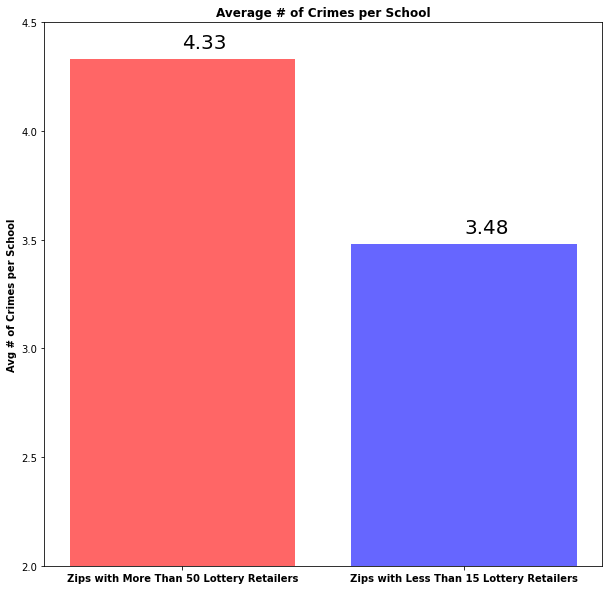

In [327]:
zip_groups = ["Zips with More Than 50 Lottery Retailers", "Zips with Less Than 15 Lottery Retailers"]
avg_crimes = [4.33, 3.48]
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Average # of Crimes per School", fontweight='bold')
plt.ylabel("Avg # of Crimes per School", fontweight = 'bold')
plt.ylim(2, 4.5)
plt.xticks(fontweight = 'bold')
for index,data in enumerate(avg_crimes):
    plt.text(x=index , y =data+.05 , s=f"{data}" , fontdict=dict(fontsize=20))
plt.savefig("Images/avg_crimes_zip_group_type.png")
plt.bar(zip_groups, avg_crimes, color=['red', 'blue'], alpha=.6)

In [328]:
# Display the top 10 zip codes with the highest # of lottery retailers:
top_10_lottery_zips = retailers_per_zip.nlargest(10, 'Retailer')
top_10_lottery_zips

,Zip,Avg # of Crimes per School,Retailer,City
146,11385,123,123,123
103,11220,110,110,110
136,11368,93,93,93
140,11373,78,78,78
95,11212,76,76,76
90,11207,75,75,75
139,11372,73,73,73
143,11377,73,73,73
109,11226,72,72,72
97,11214,71,71,71


In [329]:
# Make a dataframe with the avg # of crimes per school for the top 10 zip codes with the most lottery retailers:
top_10_lottery_zips_list = [11207, 11212, 11214, 11220, 11226, 11368, 11372, 11373, 11377, 11385]
top_10_lottery_zips = merged_df.loc[merged_df['Zip'].isin([11207, 11212, 11214, 11220, 11226, 11368, 11372, 11373, 11377, 11385])]
top_10_lottery_df = top_10_lottery_zips.groupby('Zip').first().reset_index()
top_10_lottery_df

,Zip,Avg # of Crimes per School,Retailer,City
0,11207,4.068702,78303.0,BROOKLYN
1,11212,4.015748,11720.0,BROOKLYN
2,11214,4.360000,102655.0,BROOKLYN
3,11220,3.333333,108205.0,BROOKLYN
4,11226,3.606061,89597.0,BROOKLYN
5,11368,1.777778,110941.0,CORONA
6,11372,1.809524,97570.0,JACKSON HEIGHTS
7,11373,2.392157,97966.0,ELMHURST
8,11377,1.888889,106328.0,WOODSIDE
9,11385,3.829268,19959.0,RIDGEWOOD


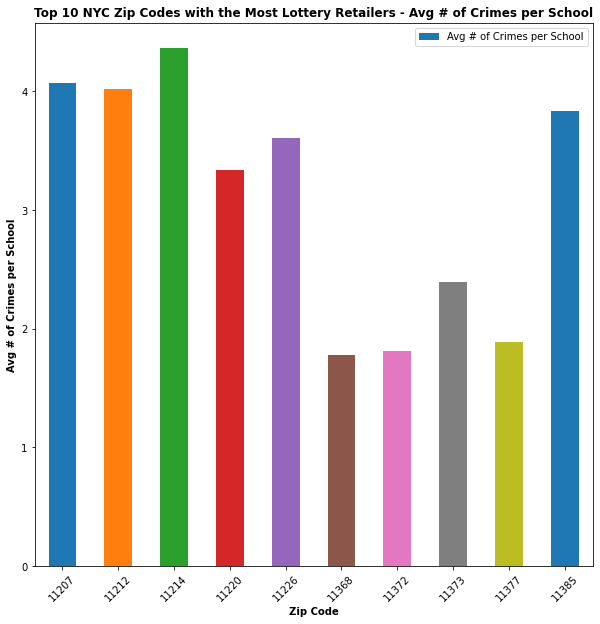

In [336]:
# Bar graph displaying the avg # of crimes per school for the top 10 zip codes with the most lottery retailers
top_10_lottery_df.plot(kind="bar", y="Avg # of Crimes per School", color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], figsize=(10, 10))
plt.title("Top 10 NYC Zip Codes with the Most Lottery Retailers - Avg # of Crimes per School", fontweight='bold')
plt.xlabel("Zip Code", fontweight = 'bold')
plt.ylabel("Avg # of Crimes per School", fontweight = 'bold')
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
plt.xticks(x, top_10_lottery_zips_list, rotation=45)
plt.savefig("Images/top_10_lottery_school_crimes.png")
plt.show()

In [337]:
# Display the average # of crimes for the top 10 zip codes with the most lottery retailers
top_10_lottery_df['Avg # of Crimes per School'].mean()

3.108145989258484

In [338]:
# Display the bottom 10 zip codes with the lowest # of lottery retailers:
bottom_10_lottery_zips = retailers_per_zip.nsmallest(10, 'Retailer')
bottom_10_lottery_zips

,Zip,Avg # of Crimes per School,Retailer,City
84,11109,1,0,0
37,10280,1,1,1
38,10282,1,1,1
64,10464,1,1,1
33,10044,2,2,2
131,11363,2,2,2
4,10006,3,3,3
121,11239,3,3,3
122,11249,4,4,4
128,11360,4,4,4


In [341]:
# Make a dataframe with the avg # of crimes per school for the bottom 10 zip codes with the lowest # of lottery retailers:
bottom_10_lottery_zips_list = [10006, 10044, 10280, 10282, 10464, 11109, 11239, 11249, 11360, 11363]
bottom_10_lottery_zips = merged_df.loc[merged_df['Zip'].isin([10006, 10044, 10280, 10282, 10464, 11109, 11239, 11249, 11360, 11363])]
bottom_10_lottery_df = bottom_10_lottery_zips.groupby('Zip').first().reset_index()
bottom_10_lottery_df

,Zip,Avg # of Crimes per School,Retailer,City
0,10006,17.833333,110661.0,NEW YORK
1,10044,0.666667,98616.0,NEW YORK
2,10280,0.666667,79034.0,NEW YORK
3,10282,1.583333,83041.0,NEW YORK
4,10464,0.666667,88628.0,BRONX
5,11109,0.333333,NaN,NaN
6,11239,1.928571,85905.0,BROOKLYN
7,11249,4.333333,108170.0,BROOKLYN
8,11360,0.222222,18487.0,BAYSIDE
9,11363,0.000000,104222.0,LITTLE NECK


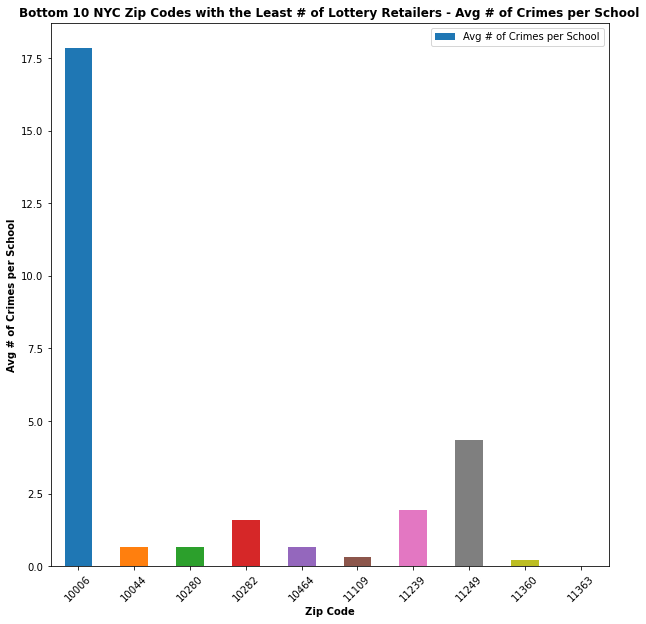

In [342]:
# Bar graph displaying the avg # of crimes per school for the bottom 10 zip codes with the lowest # of lottery retailers
bottom_10_lottery_df.plot(kind="bar", y="Avg # of Crimes per School", color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'], figsize=(10, 10))
plt.title("Bottom 10 NYC Zip Codes with the Least # of Lottery Retailers - Avg # of Crimes per School", fontweight='bold')
plt.xlabel("Zip Code", fontweight = 'bold')
plt.ylabel("Avg # of Crimes per School", fontweight = 'bold')
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
plt.xticks(x, bottom_10_lottery_zips_list, rotation=45)
plt.savefig("Images/bottom_10_lottery_school_crimes.png")
plt.show()

In [301]:
# Display the average # of crimes for the bottom 10 zip codes with the least lottery retailers:
bottom_10_lottery_df['Avg # of Crimes per School'].mean()

2.823412698412698

In [285]:
# # Look at the correlation between the number of lottery retailers and the avg # of crimes per school with a scatterplot:
# # Define plotting function:
# def plot_linear_regression(x_values, y_values, title, text_coordinates):
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r-")
#     plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
#     plt.xlabel("Zip Code") 
#     plt.ylabel("Avg # of Crimes per School")
#     print(f"The r-squared is: {rvalue}")

The r-squared is: -0.1805136924234508


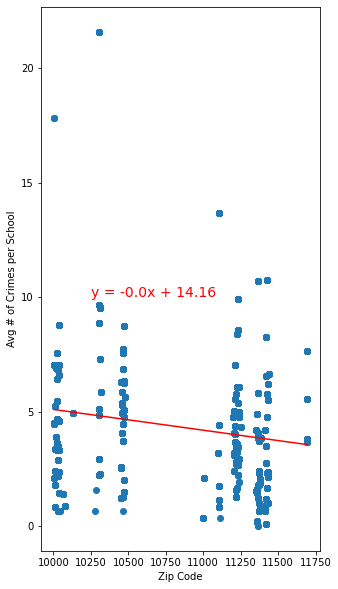

In [297]:
# Build the Plot
# fig = plt.gcf()
# fig.set_size_inches(5,10)
# x_values = merged_df["Zip"]
# y_values = merged_df["Avg # of Crimes per School"]
# plot_linear_regression(x_values,y_values,'Avg # of Crimes per School', (10250, 10))

# # Save Figure
# plt.savefig("Images/Lottery_School_Crimes_Correlation.png")

# # Show Plot
# plt.show()